In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

os.getcwd()

'/Users/fam/Desktop/dc/housing_dcproject'

All data is available at Open Data D.C.. The residential and address point data is managed by the Office of the Chief Technology Officer

In [5]:
dc_condo= pd.read_csv('raw_data/dc_condo.csv', na_values='0')

In [6]:
dc_residential=pd.read_csv('raw_data/dc_residential.csv', na_values='0')

In [7]:
dc_addresspoint= pd.read_csv('raw_data/address_points.csv', na_values='0')

/var/folders/0z/7h02r9352jl5scr693rqkgsc0000gn/T/ipykernel_21016/3491487954.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  dc_addresspoint= pd.read_csv('raw_data/address_points.csv', na_values='0')


In [8]:
dc_condo.shape
a= set(dc_condo.columns)
a

{'AC',
 'AYB',
 'BATHRM',
 'BEDRM',
 'BLDG_NUM',
 'CMPLX_NUM',
 'EYB',
 'FIREPLACES',
 'GIS_LAST_MOD_DTTM',
 'HEAT',
 'HEAT_D',
 'HF_BATHRM',
 'LANDAREA',
 'LIVING_GBA',
 'OBJECTID',
 'PRICE',
 'QUALIFIED',
 'ROOMS',
 'SALEDATE',
 'SALE_NUM',
 'SSL',
 'USECODE',
 'YR_RMDL'}

In [9]:
dc_residential.shape
b=set(dc_residential.columns)
b

{'AC',
 'AYB',
 'BATHRM',
 'BEDRM',
 'BLDG_NUM',
 'CNDTN',
 'CNDTN_D',
 'EXTWALL',
 'EXTWALL_D',
 'EYB',
 'FIREPLACES',
 'GBA',
 'GIS_LAST_MOD_DTTM',
 'GRADE',
 'GRADE_D',
 'HEAT',
 'HEAT_D',
 'HF_BATHRM',
 'INTWALL',
 'INTWALL_D',
 'KITCHENS',
 'LANDAREA',
 'NUM_UNITS',
 'OBJECTID',
 'PRICE',
 'QUALIFIED',
 'ROOF',
 'ROOF_D',
 'ROOMS',
 'SALEDATE',
 'SALE_NUM',
 'SSL',
 'STORIES',
 'STRUCT',
 'STRUCT_D',
 'STYLE',
 'STYLE_D',
 'USECODE',
 'YR_RMDL'}

In [10]:
common_columns= a.intersection(b)
common_columns

{'AC',
 'AYB',
 'BATHRM',
 'BEDRM',
 'BLDG_NUM',
 'EYB',
 'FIREPLACES',
 'GIS_LAST_MOD_DTTM',
 'HEAT',
 'HEAT_D',
 'HF_BATHRM',
 'LANDAREA',
 'OBJECTID',
 'PRICE',
 'QUALIFIED',
 'ROOMS',
 'SALEDATE',
 'SALE_NUM',
 'SSL',
 'USECODE',
 'YR_RMDL'}

In [11]:

dc_properties= pd.merge(dc_residential, dc_condo, how= 'left' , on = ['SSL', 'AC',
 'AYB',
 'BATHRM',
 'BEDRM',
 'BLDG_NUM',
 'EYB',
 'FIREPLACES',
 'GIS_LAST_MOD_DTTM',
 'HEAT',
 'HEAT_D',
 'HF_BATHRM',
 'LANDAREA',
 'OBJECTID',
 'PRICE',
 'QUALIFIED',
 'ROOMS',
 'SALEDATE',
 'SALE_NUM',
 'SSL',
 'USECODE',
 'YR_RMDL'])
    

In [12]:
dc_properties.shape

(108285, 41)

Data Type explorations and matching

In [13]:
address_subset = dc_addresspoint.drop_duplicates(['SSL']).set_index("SSL")[["FULLADDRESS","CITY","STATE","ZIPCODE",
     "NATIONALGRID","LATITUDE","LONGITUDE","ASSESSMENT_NBHD",
                             "ASSESSMENT_SUBNBHD",
                                             "CENSUS_TRACT","CENSUS_BLOCK","WARD"]]





In [14]:
pre_dcclean= pd.merge(dc_properties, address_subset, how= 'left', on= 'SSL')

In [15]:
pre_dcclean.shape

(108285, 53)

In [16]:
pre_dcclean.describe()

,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,FIREPLACES,USECODE,LANDAREA,OBJECTID,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT
count,106993.000000,60426.000000,106983.000000,106865.000000,106596.000000,106846.000000,108045.000000,54366.000000,107035.000000,106909.000000,...,46538.000000,108048.000000,108250.000000,1.082850e+05,0.0,0.0,106341.000000,106341.000000,106341.000000,106287.000000
mean,2.122017,1.114868,7.278138,1.197670,7.421789,3.425987,1935.542246,2004.738513,1970.918045,2.084517,...,1.441145,13.193238,3387.151630,7.142504e+07,NaN,NaN,20012.102604,38.916560,-77.009887,5570.281963
std,1.095683,0.357153,5.095577,0.589548,2.335673,1.121569,30.883091,111.833397,16.256320,0.982104,...,0.832016,4.998454,6157.107421,3.150879e+04,NaN,NaN,7.692462,0.034874,0.043218,3501.680288
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,154.000000,202.000000,1900.000000,0.500000,...,1.000000,11.000000,1.000000,7.104528e+07,NaN,NaN,20001.000000,38.819731,-77.113909,101.000000
25%,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,1915.000000,2000.000000,1961.000000,2.000000,...,1.000000,11.000000,1575.000000,7.139800e+07,NaN,NaN,20007.000000,38.892536,-77.035291,2002.000000
50%,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1931.000000,2008.000000,1968.000000,2.000000,...,1.000000,12.000000,2332.000000,7.142508e+07,NaN,NaN,20011.000000,38.917683,-77.005643,6802.000000
75%,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1948.000000,2014.000000,1976.000000,2.000000,...,2.000000,13.000000,4165.000000,7.145215e+07,NaN,NaN,20018.000000,38.944249,-76.982946,8804.000000
max,30.000000,12.000000,13.000000,12.000000,101.000000,24.000000,2023.000000,20212.000000,2022.000000,275.000000,...,13.000000,995.000000,942632.000000,7.147922e+07,NaN,NaN,20052.000000,38.995540,-76.909758,11100.000000


In [17]:
dc_properties1= pre_dcclean.drop_duplicates()

In [18]:
dc_properties1.shape

(108285, 53)

In [19]:
dc_properties1.columns

Index(['SSL', 'BATHRM', 'HF_BATHRM', 'HEAT', 'HEAT_D', 'AC', 'NUM_UNITS',
       'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE',
       'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STYLE_D',
       'STRUCT', 'STRUCT_D', 'GRADE', 'GRADE_D', 'CNDTN', 'CNDTN_D', 'EXTWALL',
       'EXTWALL_D', 'ROOF', 'ROOF_D', 'INTWALL', 'INTWALL_D', 'KITCHENS',
       'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'OBJECTID',
       'CMPLX_NUM', 'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD'],
      dtype='object')

In [20]:
categories = [['CNDTN_D','CNDTN'],['HEAT_D','HEAT'],['STYLE','STYLE'],['STRUCT','STRUCT'],['GRADE_D','GRADE'],['ROOF_D','ROOF'],['EXTWALL_D','EXTWALL'],['INTWALL_D','INTWALL']]
cat_drop = []
for c in categories:
    dc_properties1[c[1]] = dc_properties1[c[0]].astype('category')
    cat_drop.append(c[0])
    #eliminate redundant dummy variables
dc_properties1.drop(cat_drop, inplace=True, axis=1)


In [21]:
dc_properties1.shape

(108285, 45)

In [22]:
dc_properties1.shape

(108285, 45)

In [23]:
#Dropping the two column
dc_properties2= dc_properties1.drop(columns=['CMPLX_NUM','LIVING_GBA'])

In [24]:
dc_properties2.shape

(108285, 43)

In [25]:
dc_properties2[(dc_properties2.isnull().sum(axis=1) !=0)]["PRICE"].describe()

count    5.094600e+04
mean     6.128622e+05
std      6.425302e+05
min      1.000000e+00
25%      2.699592e+05
50%      4.849700e+05
75%      8.000000e+05
max      2.510000e+07
Name: PRICE, dtype: float64

In [26]:
dc_properties2.to_csv('partly_cleandcproperties.csv')

In [27]:
dc_properties2.shape

(108285, 43)

In [28]:
dc_properties2.isnull().sum()

SSL                       0
BATHRM                 1292
HF_BATHRM             47859
HEAT                   1249
AC                     1301
NUM_UNITS              1420
ROOMS                  1689
BEDRM                  1439
AYB                     240
YR_RMDL               53919
EYB                    1250
STORIES                1376
SALEDATE                  0
PRICE                 46349
QUALIFIED                 0
SALE_NUM                  0
GBA                    1259
BLDG_NUM                  0
STYLE_D                1250
STRUCT_D               1249
GRADE                  1249
CNDTN                  1249
EXTWALL                1249
ROOF                   1249
INTWALL                1249
KITCHENS               1361
FIREPLACES            61747
USECODE                 237
LANDAREA                 35
GIS_LAST_MOD_DTTM         0
OBJECTID                  0
FULLADDRESS            1944
CITY                   1944
STATE                  1944
ZIPCODE                1944
NATIONALGRID        

In [29]:
#Checking Datetime:No issue on sale date (range is b/n 20th or 21st century)

print(dc_properties2["SALEDATE"].sort_values(ascending=True).head(5))
print(dc_properties2["SALEDATE"].sort_values(ascending=False).head(5))



108284    1900/01/01 00:00:00+00
77067     1900/01/01 00:00:00+00
29485     1900/01/01 00:00:00+00
49453     1900/01/01 00:00:00+00
77077     1900/01/01 00:00:00+00
Name: SALEDATE, dtype: object
5640      2022/07/18 00:00:00+00
46109     2022/07/18 00:00:00+00
100532    2022/07/18 00:00:00+00
100413    2022/07/18 00:00:00+00
102623    2022/07/18 00:00:00+00
Name: SALEDATE, dtype: object


In [30]:
dc_properties2.columns

Index(['SSL', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE_D', 'STRUCT_D',
       'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS',
       'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'OBJECTID',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD'],
      dtype='object')

In [31]:
print(dc_properties2["YR_RMDL"].sort_values(ascending=True).head(5))
print(dc_properties2["YR_RMDL"].sort_values(ascending=False).head(5))

56077     202.0
60559     218.0
14513    1880.0
74387    1880.0
17869    1900.0
Name: YR_RMDL, dtype: float64
19643    20212.0
62118    20167.0
27589     2104.0
68142     2023.0
44654     2023.0
Name: YR_RMDL, dtype: float64


In [32]:
dc_properties2["YR_RMDL"]=dc_properties2["YR_RMDL"].astype(str)

In [33]:
print(dc_properties2["YR_RMDL"].sort_values(ascending=True).head(5))
print(dc_properties2["YR_RMDL"].sort_values(ascending=False).head(5))

14513    1880.0
74387    1880.0
17869    1900.0
5342     1900.0
41047    1911.0
Name: YR_RMDL, dtype: object
54142    nan
66042    nan
66053    nan
66052    nan
66050    nan
Name: YR_RMDL, dtype: object


In [34]:
#df['sale_date'] = pd.to_datetime(df['sale_date'])

dc_properties2["YR_RMDL"]= pd.to_datetime(dc_properties2["YR_RMDL"], errors='ignore')

In [35]:
dc_properties["AYB"]= pd.to_datetime(dc_properties2["AYB"], errors='ignore')

In [36]:
dc_properties2["EYB"]= pd.to_datetime(dc_properties2["EYB"], errors='ignore')

In [37]:
dc_properties2.shape

(108285, 43)

In [38]:
dc_properties2.to_csv('dc_data.csv')

In [39]:
percentage_missingness= dc_properties2.isnull().mean()*100
percentage_missingness

SSL                    0.000000
BATHRM                 1.193148
HF_BATHRM             44.197257
HEAT                   1.153438
AC                     1.201459
NUM_UNITS              1.311354
ROOMS                  1.559773
BEDRM                  1.328901
AYB                    0.221637
YR_RMDL                0.000000
EYB                    1.154361
STORIES                1.270721
SALEDATE               0.000000
PRICE                 42.802789
QUALIFIED              0.000000
SALE_NUM               0.000000
GBA                    1.162673
BLDG_NUM               0.000000
STYLE_D                1.154361
STRUCT_D               1.153438
GRADE                  1.153438
CNDTN                  1.153438
EXTWALL                1.153438
ROOF                   1.153438
INTWALL                1.153438
KITCHENS               1.256868
FIREPLACES            57.022672
USECODE                0.218867
LANDAREA               0.032322
GIS_LAST_MOD_DTTM      0.000000
OBJECTID               0.000000
FULLADDR

Handling Missing Values
1. convert all missing values to Null
2. Analyz type and amount of Missinous 
3. Delete or Impute as necessery 
4. Evalute and compare the performance of the treated/imputed data

In [40]:
import missingno as msno

#Possiblereasonsformissingness
 #MissingCompletelyatRandom(MCAR),
 #MissingatRandom(MAR)or
 #MissingNotatRandom(MNAR)


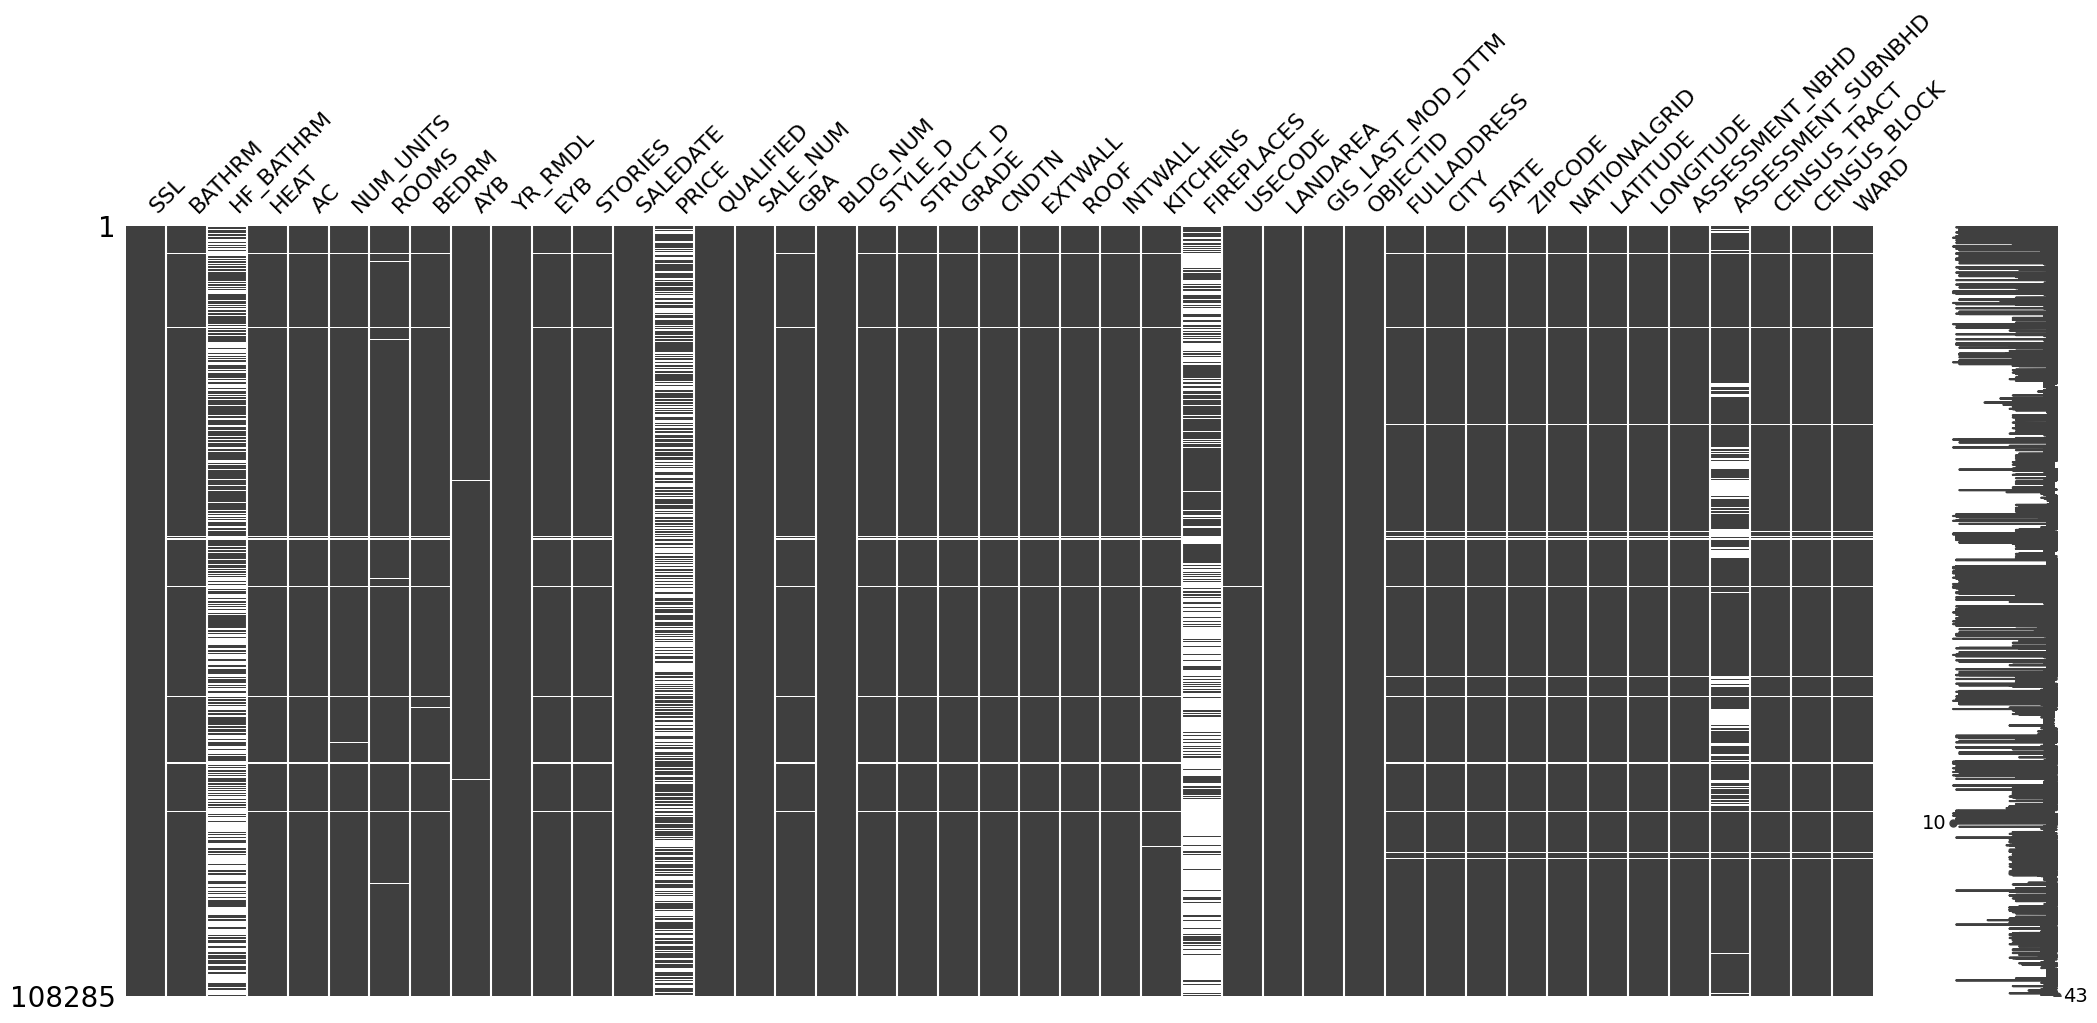

In [41]:
msno.matrix(dc_properties2);

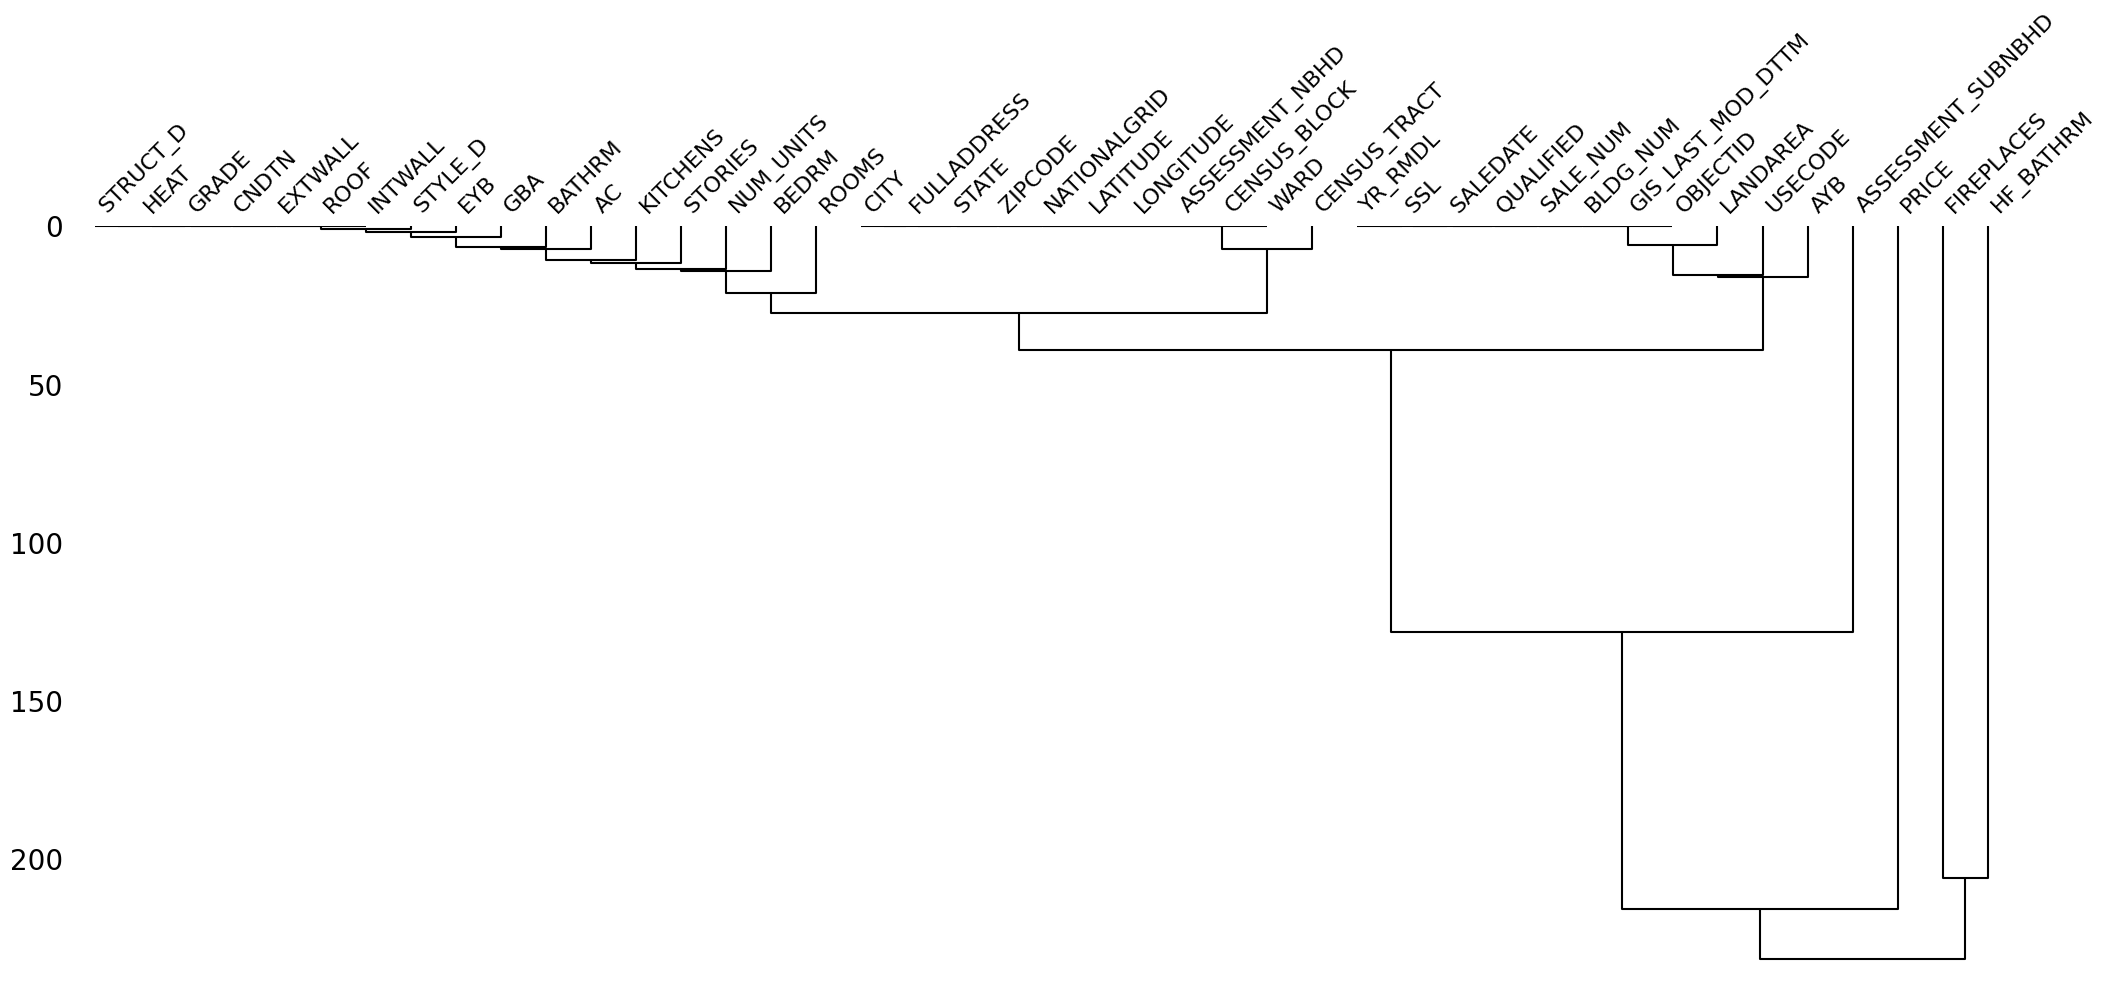

In [42]:
msno.dendrogram(dc_properties2);

In [43]:
dc_final=dc_properties2.dropna()


In [44]:
dc_final.to_csv("dc_final.csv")

In [45]:
price= dc_final.PRICE

In [46]:
price

2         1670000.0
6         1427078.0
9          840000.0
18        1236000.0
23        3150000.0
            ...    
108224     743000.0
108236     183000.0
108237     415000.0
108248     528212.0
108253     161000.0
Name: PRICE, Length: 15327, dtype: float64

In [47]:
price.mean()

1057755.205323938

In [48]:
price.max()

23960287.0

In [49]:
price.min()

1377.0

In [50]:
#plt.scatter(dc_final.PRICE, dc_final.index);

E-mail from customerservice.octo@dc.gov:
"""Thank you for your inquiry. I spoke with a colleague who maintains the property records. 
For the field/variable "QUALIFIED" the description is "Qualified Sales". 

The value "U" is unqualified sales meaning these sales are any transactions that 
are not reflective of the actual market value of a property, e.g., foreclosures 
and short sales. This valuation code can also reflect a transaction that does not 
meet the arm's-length requirement. This designation is determined by the Township Assessor.

The Value "Q" is qualified sales meaning these are usable sales: 
    an arm's-length transaction of a property between or among unrelated parties 
    (or entities) who (or which) are not under any duress to buy or sell the property 
    which has been offered on the open market and advertised for sale. 
    This designation is determined by the Township Assessor.""""

In [51]:
dc_final_q= dc_final[dc_final['QUALIFIED']=='Q']

In [52]:
dc_final_q.to_csv("dc_housing1.csv")

In [53]:
dc_housing= pd.read_csv("dc_housing1.csv")

In [54]:
dc_hosuing.shape

NameError: name 'dc_hosuing' is not defined

In [ ]:
# List of column names with object data type
object_columns = dc_housing.select_dtypes(include=['object']).columns

# Convert object columns to categorical
dc_housing[object_columns] = dc_housing[object_columns].astype('category')

# Check the data types after conversion
print(dc_housing.dtypes)

In [ ]:
# Change multiple columns back to 'object' data type
columns_to_change = ['SSL', 'CITY', 'FULLADDRESS', 'STATE', 'ZIPCODE']

for column in columns_to_change:
    dc_housing[column] = dc_housing[column].astype('object')

# Check the data types after the changes
print(dc_housing.dtypes)


In [ ]:
import pandas as pd

# Convert the "SALEDATE" column to datetime data type
dc_housing["SALEDATE"] = pd.to_datetime(dc_housing["SALEDATE"])

# Verify the data type conversion
print(dc_housing["SALEDATE"].dtype)


In [ ]:

# Convert the "YR_RMDL" column to datetime data type
dc_housing['YR_RMDL'] = pd.to_datetime(dc_housing['YR_RMDL'], errors='coerce')

# Verify the data type conversion
print(dc_housing['YR_RMDL'].dtype)


In [ ]:
# Convert the "AYB" column to datetime data type
dc_housing['AYB'] = pd.to_datetime(dc_housing['AYB'], errors='coerce')

# Verify the data type conversion
print(dc_housing['AYB'].dtype)


In [ ]:
# Define the features you want to investigate (numerical col)
features_to_investigate = ['BATHRM', 'ROOMS', 'BEDRM', 'STORIES', 'GBA', 'KITCHENS', 'LANDAREA']

# Create scatter plots for each feature
for feature in features_to_investigate:
    plt.figure(figsize=(8, 6))
    plt.scatter(dc_housing[feature], dc_housing['PRICE'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categorical variables you want to create box plots for
categorical_vars = ['HEAT', 'AC', 'EYB', 'QUALIFIED', 'STYLE_D', 'STRUCT_D']

# Create box plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='PRICE', data=dc_housing)
    plt.title(f'Box Plot of {var} vs. Price')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


In [ ]:
# Compute the correlation between numeric features and "PRICE"
numeric_features = dc_housing.select_dtypes(include=['float64', 'int64'])
correlations = numeric_features.corrwith(dc_housing['PRICE'])

# Sort the correlations in descending order
correlations = correlations.sort_values(ascending=False)

# Display the correlations
print(correlations)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns
numeric_columns = dc_housing.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()


In [ ]:
#pip install selenium
# Create a pairplot of the wine data
sns.pairplot(dc_housing, diag_kind='kde')  # Use 'diag_kind' to include kernel density estimates on the diagonal
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Set the bounding box to focus on the DC area
min_lon, max_lon = -77.119759, -76.909393
min_lat, max_lat = 38.791645, 38.995548

# Filter your dataset based on the bounding box
dc_housing_filtered = dc_housing[
    (dc_housing['LONGITUDE'] >= min_lon) & (dc_housing['LONGITUDE'] <= max_lon) &
    (dc_housing['LATITUDE'] >= min_lat) & (dc_housing['LATITUDE'] <= max_lat)
]

# Create a scatter plot using longitude, latitude, and price
sc = ax.scatter(
    dc_housing_filtered['LONGITUDE'],
    dc_housing_filtered['LATITUDE'],
    c=dc_housing_filtered['PRICE'],
    cmap='viridis',
    s=5,  # Adjust the size of the points
    norm=LogNorm(),  # Use logarithmic scaling for price
)

# Create a Polygon representing the boundary of the DC area
dc_boundary = Polygon([
    (-77.119759, 38.791645),
    (-77.119759, 38.995548),
    (-76.909393, 38.995548),
    (-76.909393, 38.791645)
])
gdf = gpd.GeoDataFrame({'geometry': [dc_boundary]}, crs="EPSG:4326")

# Plot the DC boundary on top of the scatter plot
gdf.boundary.plot(ax=ax, color='red', linewidth=1)

# Set the title and labels
ax.set_title('DC Housing Prices - Awesome Map with DC Boundary')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Create a colorbar for price
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(sc, cax=cax, label='Price')

# Show the plot
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm, ListedColormap
from matplotlib.lines import Line2D
import numpy as np

# Define price ranges and their corresponding colors
price_ranges = {
    'up to 300,000': 'blue',
    '300,000 - 500,000': 'green',
    '500,000 - 800,000': 'orange',
    '800,000 - 1,000,000': 'red',
    '1,000,000 - 10,000,000': 'purple',
    'over 10,000,000': 'brown'
}

# Create a custom colormap for categorical data
cmap = ListedColormap(list(price_ranges.values()))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Set the bounding box to focus on the DC area
min_lon, max_lon = -77.119759, -76.909393
min_lat, max_lat = 38.791645, 38.995548

# Filter your dataset based on the bounding box
dc_housing_filtered = dc_housing[
    (dc_housing['LONGITUDE'] >= min_lon) & (dc_housing['LONGITUDE'] <= max_lon) &
    (dc_housing['LATITUDE'] >= min_lat) & (dc_housing['LATITUDE'] <= max_lat)
]

# Map price ranges to colors
colors = [price_ranges['up to 300,000']] * len(dc_housing_filtered)

for key, color in price_ranges.items():
    if key == 'up to 300,000':
        mask = dc_housing_filtered['PRICE'] <= 300000
    elif key == 'over 10,000,000':
        mask = dc_housing_filtered['PRICE'] > 10000000
    else:
        mask = (dc_housing_filtered['PRICE'] > int(key.split(' - ')[0].replace(',', ''))) & (dc_housing_filtered['PRICE'] <= int(key.split(' - ')[1].replace(',', '')))

    colors = np.where(mask, color, colors)

# Create a scatter plot using longitude, latitude, and categorical price
sc = ax.scatter(
    dc_housing_filtered['LONGITUDE'],
    dc_housing_filtered['LATITUDE'],
    c=colors,
    cmap=cmap,
    s=5,  # Adjust the size of the points
)

# Create a legend for the price ranges
legend_elements = [Line2D([0], [0], marker='o', color='w', label=key, markerfacecolor=color, markersize=5) for key, color in price_ranges.items()]
ax.legend(handles=legend_elements, loc='upper right', title='Price Range')

# Set the title and labels
ax.set_title('DC Housing Prices - Awesome Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add gridlines
ax.grid(color='blue', linestyle='--', linewidth=0.1)

# Show the plot
plt.show()


In [55]:
dc_housing.to_csv("dc.housing_c.csv")

In [56]:
dc_housing_c= pd.read_csv("dc.housing_c.csv")

In [58]:

#  take out the outlier data in column Price, cause is it a target for this prediction.

def check_outlier(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return data[(data[col] < lower_limit) | (data[col] > upper_limit)].index ,upper_limit,lower_limit

# One of the causes of the chaotic results of our statistical analysis is due to data outliers


In [59]:
index_to_drop, upper_limit, lower_limit = check_outlier(dc_housing_c, 'PRICE')
dc_housing_c.drop(index_to_drop, inplace=True)
dc_housing_c = dc_housing_c.reset_index().drop('index', axis=1)


In [60]:
dc_housing_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        12607 non-null  int64  
 1   Unnamed: 0          12607 non-null  int64  
 2   SSL                 12607 non-null  object 
 3   BATHRM              12607 non-null  float64
 4   HF_BATHRM           12607 non-null  float64
 5   HEAT                12607 non-null  object 
 6   AC                  12607 non-null  object 
 7   NUM_UNITS           12607 non-null  float64
 8   ROOMS               12607 non-null  float64
 9   BEDRM               12607 non-null  float64
 10  AYB                 12607 non-null  float64
 11  YR_RMDL             9216 non-null   float64
 12  EYB                 12607 non-null  object 
 13  STORIES             12607 non-null  float64
 14  SALEDATE            12607 non-null  object 
 15  PRICE               12607 non-null  float64
 16  QUAL

In [61]:
# Replace null values in the "year remodel" column with the next available value
dc_housing_c['YR_RMDL'].fillna(method='ffill', inplace=True)

In [63]:
price=dc_housing_c.PRICE

In [64]:
price.mean()

945708.1824383279

In [65]:
price.max()

2425000.0

In [66]:
price.min()

28155.0

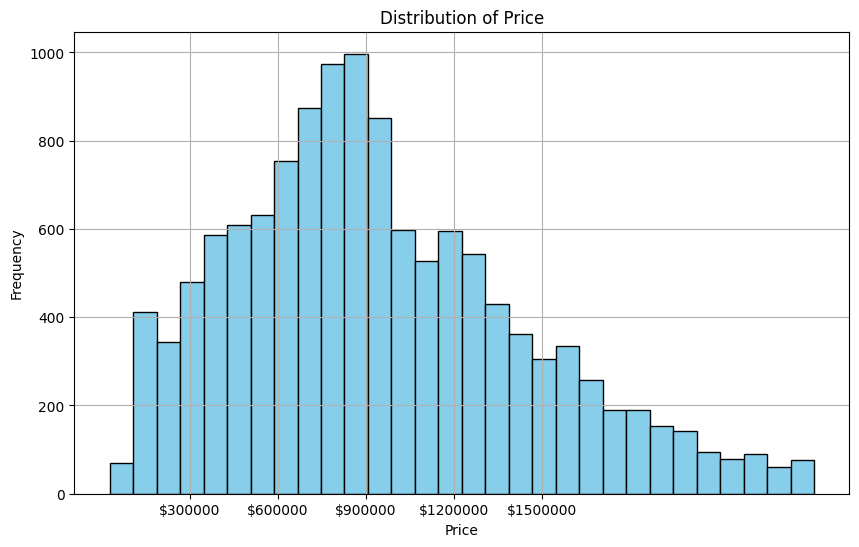

In [67]:

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'dc_housing' is your DataFrame with the 'PRICE' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(dc_housing_c['PRICE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

# Customize x-axis labels and format them without scientific notation
x_labels = [300000, 600000, 900000, 1200000, 1500000]

def price_formatter(x, pos):
    return '${:.0f}'.format(x)

plt.xticks(x_labels)
plt.gca().xaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.show()


In [ ]:
dc_housing.info()

/var/folders/0z/7h02r9352jl5scr693rqkgsc0000gn/T/ipykernel_21016/4258333004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WARD',data=dc_housing_c,ax=ax[1],order=dc_housing_c['WARD'].value_counts().index,palette=color)
/var/folders/0z/7h02r9352jl5scr693rqkgsc0000gn/T/ipykernel_21016/4258333004.py:6: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='WARD',data=dc_housing_c,ax=ax[1],order=dc_housing_c['WARD'].value_counts().index,palette=color)


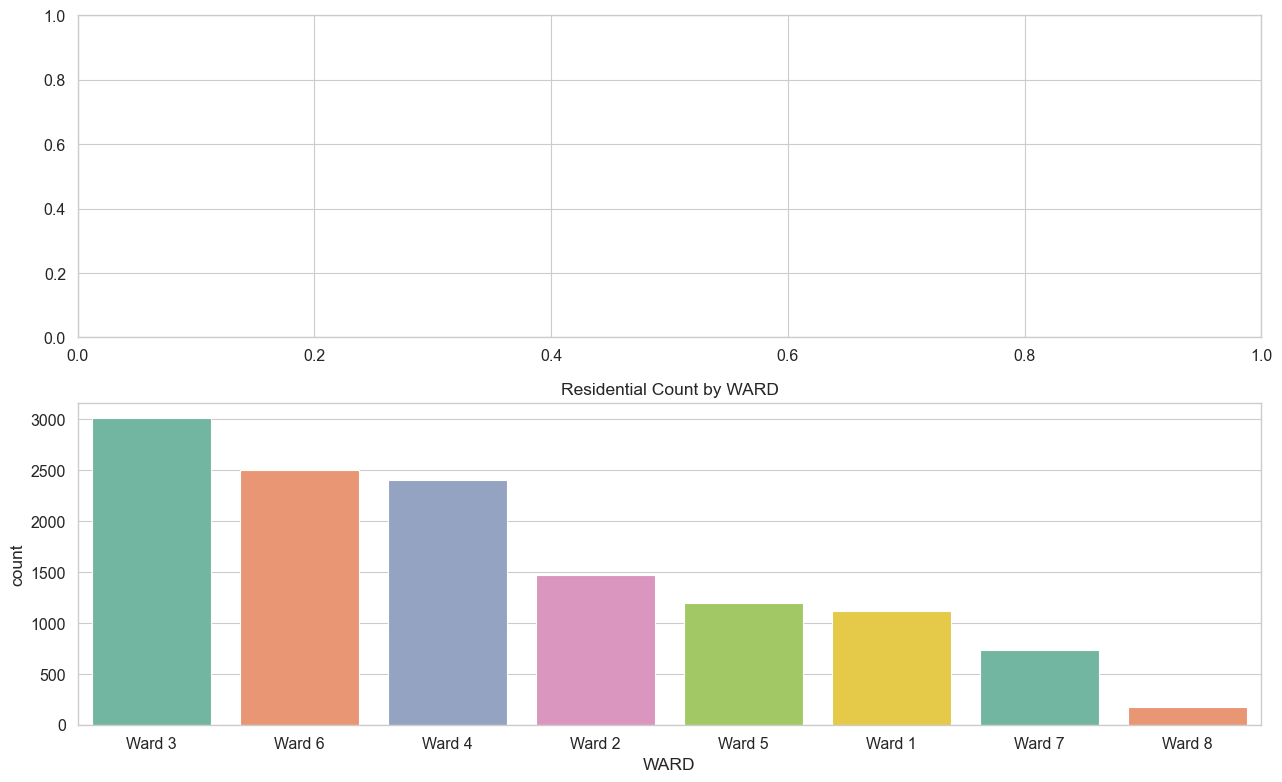

In [68]:
# For Ward 
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
fig, ax = plt.subplots(2,1,figsize=(13,8))
sns.countplot(x='WARD',data=dc_housing_c,ax=ax[1],order=dc_housing_c['WARD'].value_counts().index,palette=color)
ax[1].set_title('Residential Count by WARD')
plt.tight_layout()
plt.show()


/var/folders/0z/7h02r9352jl5scr693rqkgsc0000gn/T/ipykernel_21016/2087794339.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WARD', y='PRICE', data=dc_housing_c, order=dc_housing_c['WARD'].value_counts().index, palette='Set2')


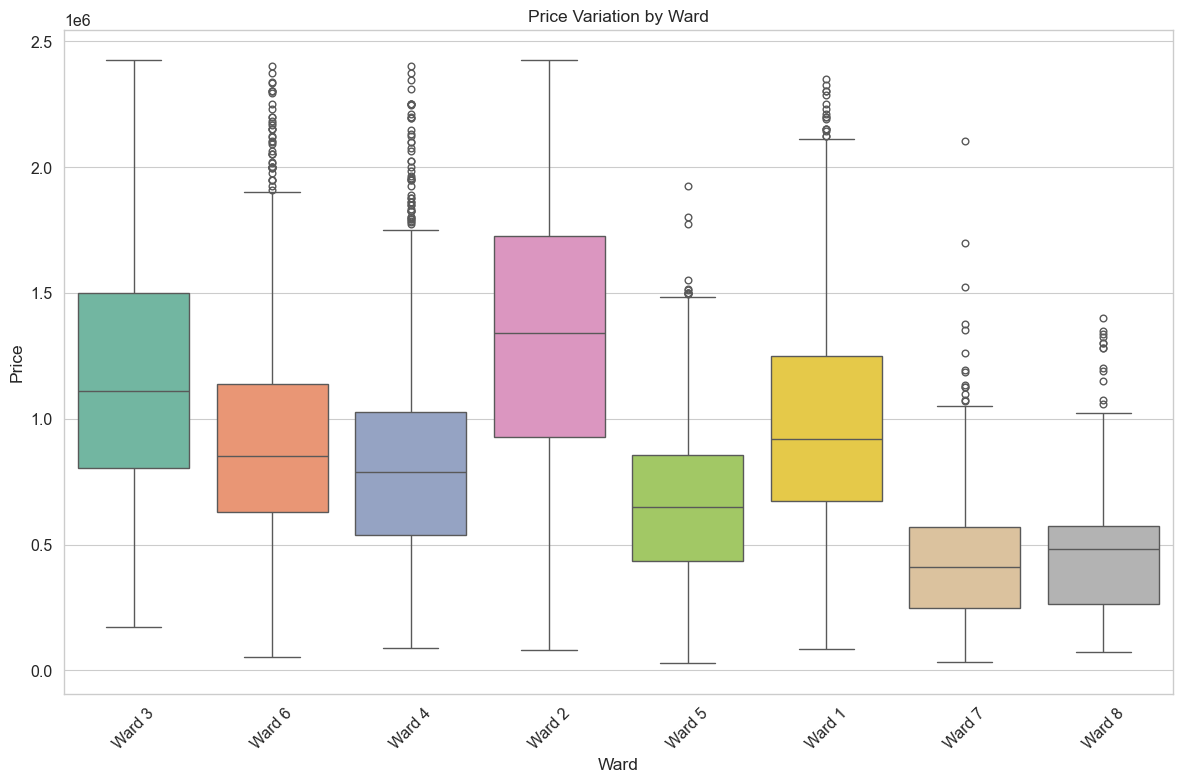

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context for the plot
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)

# Create a boxplot to show price variation by ward
plt.figure(figsize=(12, 8))
sns.boxplot(x='WARD', y='PRICE', data=dc_housing_c, order=dc_housing_c['WARD'].value_counts().index, palette='Set2')
plt.title('Price Variation by Ward')
plt.xlabel('Ward')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate ward labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [74]:
# Group the data by ward and calculate the mean price for each ward
ward_price_mean = dc_housing_c.groupby('WARD')['PRICE'].mean()

# Format the mean prices as actual numbers
formatted_wards = ward_price_mean.map('{:,.0f}'.format)

print(formatted_wards)


WARD
Ward 1      982,809
Ward 2    1,329,045
Ward 3    1,160,467
Ward 4      813,714
Ward 5      659,506
Ward 6      890,047
Ward 7      438,169
Ward 8      483,127
Name: PRICE, dtype: object


In [79]:
dc_housing_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        12607 non-null  int64  
 1   Unnamed: 0          12607 non-null  int64  
 2   SSL                 12607 non-null  object 
 3   BATHRM              12607 non-null  float64
 4   HF_BATHRM           12607 non-null  float64
 5   HEAT                12607 non-null  object 
 6   AC                  12607 non-null  object 
 7   NUM_UNITS           12607 non-null  float64
 8   ROOMS               12607 non-null  float64
 9   BEDRM               12607 non-null  float64
 10  AYB                 12607 non-null  float64
 11  YR_RMDL             12607 non-null  float64
 12  EYB                 12607 non-null  object 
 13  STORIES             12607 non-null  float64
 14  SALEDATE            12607 non-null  object 
 15  PRICE               12607 non-null  float64
 16  QUAL

In [82]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming you have a DataFrame named 'df')
# Select the relevant numeric features
numeric_features = dc_housing_c[['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'STORIES',
                      'PRICE', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
                      'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT']]

# Standardize the numeric features
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# Apply PCA to the standardized numeric features
pca = PCA()
X_pca = pca.fit_transform(numeric_features_scaled)

# Choose the number of components based on explained variance ratio
# select components that explain 95% of the variance
n_components = 0.95
n_selected_components = next(i for i, explained_variance in enumerate(pca.explained_variance_ratio_.cumsum()) if explained_variance >= n_components)

# Select the top N principal components for further analysis
X_selected = X_pca[:, :n_selected_components]

# Now you can use X_selected for modeling or analysis with reduced dimensionality.


In [83]:
print(pca.explained_variance_ratio_)


[2.39196135e-01 1.87098184e-01 7.97943216e-02 7.65137134e-02
 6.91521595e-02 5.16516980e-02 5.04971520e-02 4.27869013e-02
 3.92672943e-02 3.12915862e-02 2.65787736e-02 2.29392253e-02
 1.90944101e-02 1.52547825e-02 1.38535567e-02 1.30745085e-02
 1.09754619e-02 5.52795085e-03 5.45218445e-03 2.26741548e-36]


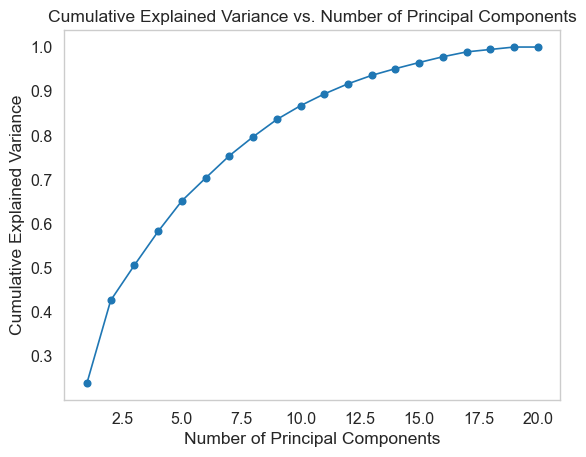

In [84]:
import matplotlib.pyplot as plt

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()


In [85]:
component_loadings = pca.components_
print(component_loadings)


[[ 3.60479119e-01  7.17126174e-02  2.62596957e-02  3.08328355e-01
   3.39005842e-01  1.43392688e-01  3.52391106e-02  1.51445625e-01
   2.92208610e-01 -2.31493275e-02  3.88295872e-01 -2.06795153e-25
   5.01653746e-02  1.81370922e-01  3.14419224e-02  2.62594291e-01
   1.42929089e-01  2.33884782e-01 -3.25171454e-01 -2.94233058e-01]
 [ 1.27901621e-01 -5.92385556e-02  4.57109676e-01  1.17224471e-01
   1.38154345e-01 -2.03610704e-01 -1.05202848e-02  1.78656582e-01
   1.21292649e-01  6.71382393e-02  4.72058165e-02 -0.00000000e+00
   4.37616229e-01  1.68209882e-01  4.36721598e-01 -2.04154420e-01
  -2.86252257e-01 -2.27856375e-01  1.70497335e-01  1.68181366e-01]
 [-4.85001418e-02  1.51966975e-01  1.75294269e-01  1.53420870e-01
   1.02124972e-01  2.15288482e-01 -2.07084230e-01 -1.48853271e-01
  -4.34926980e-01 -5.15364240e-01  7.25029548e-02  0.00000000e+00
   1.18729656e-01 -2.22695463e-03  1.95299897e-01  2.99970513e-01
   3.32586263e-01 -2.29561835e-02  1.86037828e-01  2.24661364e-01]
 [ 1.97

In [86]:
print(X_selected)


[[ 1.3747097   4.26586172 -1.21416137 ... -0.76459123  0.29365246
  -0.1755543 ]
 [ 0.56474674  4.03464779  0.2992579  ... -0.43349493 -0.03846488
  -0.10726234]
 [ 0.6943728   3.95580134 -0.55204357 ... -0.83126678  0.28094547
  -0.23477315]
 ...
 [-2.95606098 -0.45476814  1.06827855 ... -0.49119822  0.20513847
  -0.7754131 ]
 [-1.17960272  0.20385353  1.79076039 ...  0.31302705  0.1116669
  -0.98036423]
 [-2.32719131 -0.81535417  1.95700202 ... -0.39627601  0.86532991
  -0.90579363]]


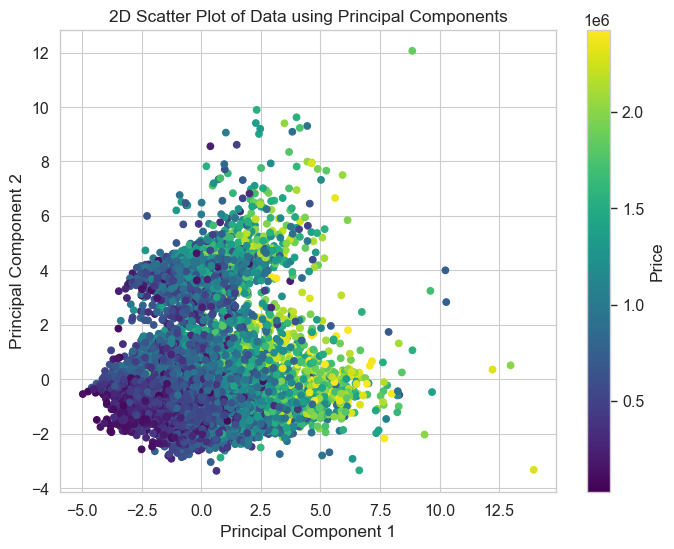

In [88]:
import matplotlib.pyplot as plt

# Assuming X_selected contains the selected principal components
# Extract the first two principal components
pc1 = X_selected[:, 0]
pc2 = X_selected[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c=dc_housing_c['PRICE'], cmap='viridis')  # Use 'PRICE' as the color scale
plt.colorbar(label='Price')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of Data using Principal Components')

plt.show()


In [89]:

component_loadings = pca.components_

# identify which original variables contribute the most to each component
for i, component_loading in enumerate(component_loadings):
    print(f"Principal Component {i + 1} Loadings:")
    for j, loading in enumerate(component_loading):
        print(f"Variable {numeric_features.columns[j]}: {loading:.4f}")
    print("\n")


Principal Component 1 Loadings:
Variable BATHRM: 0.3605
Variable HF_BATHRM: 0.0717
Variable NUM_UNITS: 0.0263
Variable ROOMS: 0.3083
Variable BEDRM: 0.3390
Variable AYB: 0.1434
Variable YR_RMDL: 0.0352
Variable STORIES: 0.1514
Variable PRICE: 0.2922
Variable SALE_NUM: -0.0231
Variable GBA: 0.3883
Variable BLDG_NUM: -0.0000
Variable KITCHENS: 0.0502
Variable FIREPLACES: 0.1814
Variable USECODE: 0.0314
Variable LANDAREA: 0.2626
Variable ZIPCODE: 0.1429
Variable LATITUDE: 0.2339
Variable LONGITUDE: -0.3252
Variable CENSUS_TRACT: -0.2942


Principal Component 2 Loadings:
Variable BATHRM: 0.1279
Variable HF_BATHRM: -0.0592
Variable NUM_UNITS: 0.4571
Variable ROOMS: 0.1172
Variable BEDRM: 0.1382
Variable AYB: -0.2036
Variable YR_RMDL: -0.0105
Variable STORIES: 0.1787
Variable PRICE: 0.1213
Variable SALE_NUM: 0.0671
Variable GBA: 0.0472
Variable BLDG_NUM: -0.0000
Variable KITCHENS: 0.4376
Variable FIREPLACES: 0.1682
Variable USECODE: 0.4367
Variable LANDAREA: -0.2042
Variable ZIPCODE: -0.2863

In [97]:
'''import folium
 import geopandas as gpd
from shapely.geometry import Point

# Load the Washington, D.C. boundary data (GeoJSON file)
dc_boundary = gpd.read_file('dc.geojson')

# Create a GeoDataFrame for your data
gdf = gpd.GeoDataFrame(dc_housing, 
                      geometry=gpd.points_from_xy(dc_housing.LONGITUDE, dc_housing.LATITUDE))

# Create a map centered around Washington, D.C.
map_dc = folium.Map(location=[dc_boundary.centroid.y.values[0], dc_boundary.centroid.x.values[0]], zoom_start=13)

# Create a feature group for the boundary
boundary_fg = folium.FeatureGroup(name='Washington, D.C. Boundary')

# Add the boundary as a GeoJSON layer
folium.GeoJson(dc_boundary).add_to(boundary_fg)

# Add the boundary feature group to the map
boundary_fg.add_to(map_dc)

# Create a feature group for the data points, colored by 'WARD'
ward_colors = {'Ward 1': 'red', 'Ward 2': 'green', 'Ward 3': 'blue', 'Ward 4': 'purple',
              'Ward 5': 'orange', 'Ward 6': 'yellow', 'Ward 7': 'pink', 'Ward 8': 'brown'}

for ward, color in ward_colors.items():
    ward_data = gdf[gdf['WARD'] == ward]
    for idx, row in ward_data.iterrows():
        folium.Marker([row['LATITUDE'], row['LONGITUDE']], tooltip=row['WARD'], icon=folium.Icon(color=color)).add_to(map_dc)

# Save the map as an HTML file
map_dc.save('dc_map.html')'''


"import folium\n import geopandas as gpd\nfrom shapely.geometry import Point\n\n# Load the Washington, D.C. boundary data (GeoJSON file)\ndc_boundary = gpd.read_file('dc.geojson')\n\n# Create a GeoDataFrame for your data\ngdf = gpd.GeoDataFrame(dc_housing, \n                      geometry=gpd.points_from_xy(dc_housing.LONGITUDE, dc_housing.LATITUDE))\n\n# Create a map centered around Washington, D.C.\nmap_dc = folium.Map(location=[dc_boundary.centroid.y.values[0], dc_boundary.centroid.x.values[0]], zoom_start=13)\n\n# Create a feature group for the boundary\nboundary_fg = folium.FeatureGroup(name='Washington, D.C. Boundary')\n\n# Add the boundary as a GeoJSON layer\nfolium.GeoJson(dc_boundary).add_to(boundary_fg)\n\n# Add the boundary feature group to the map\nboundary_fg.add_to(map_dc)\n\n# Create a feature group for the data points, colored by 'WARD'\nward_colors = {'Ward 1': 'red', 'Ward 2': 'green', 'Ward 3': 'blue', 'Ward 4': 'purple',\n              'Ward 5': 'orange', 'Ward 6': 